# <strong>R 데이터 편집 (dplyR)
<br>
## <strong>1 데이터 변경
<strong>http://www.devtimes.com/194  (R 단축키)

In [1]:
df_y   <- data.frame(var1 = c(1,2,1), var2 = c(2,3,2))
library(dplyr)
df_new <- df_y ; df_new
df_new <- rename(df_new, v2 = var2)  ; df_new
# 특정 컬럼명 변경 : rename(data.Frame, 변경내용 = 원본) cf) 순서에 주의


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



var1,var2
1,2
2,3
1,2


var1,v2
1,2
2,3
1,2


In [2]:
df_new$var_sum <- df_new$var1 + df_new$v2  # 파생컬럼 생성
df_new

var1,v2,var_sum
1,2,3
2,3,5
1,2,3


In [3]:
df_new$var1 + df_new$v2   # data.frame의 연산 : 기본사칙연산 (index기준 개별연산)
colSums(df_new)           # 필드별 연산 

[1] 3 5 3

var1      v2 var_sum 
      4       7      11

In [4]:
# 컬럼명 전체 변경
colnames(df_new) = c('col1', 'col2') ; df_new

col1,col2,NA
1,2,3
2,3,5
1,2,3


<br>
## <strong>2 파생변수 생성

In [5]:
library(ggplot2)
class(mpg)                  # 자료가 3가지 형태를 갖는다 : 'tbl_df' 'tbl' 'data.frame'
mpg <- data.frame(mpg)
summary(mpg)                # 데이터의 요약

[1] "tbl_df"     "tbl"        "data.frame"

 manufacturer          model               displ            year     
 Length:234         Length:234         Min.   :1.600   Min.   :1999  
 Class :character   Class :character   1st Qu.:2.400   1st Qu.:1999  
 Mode  :character   Mode  :character   Median :3.300   Median :2004  
                                       Mean   :3.472   Mean   :2004  
                                       3rd Qu.:4.600   3rd Qu.:2008  
                                       Max.   :7.000   Max.   :2008  
      cyl           trans               drv                 cty       
 Min.   :4.000   Length:234         Length:234         Min.   : 9.00  
 1st Qu.:4.000   Class :character   Class :character   1st Qu.:14.00  
 Median :6.000   Mode  :character   Mode  :character   Median :17.00  
 Mean   :5.889                                         Mean   :16.86  
 3rd Qu.:8.000                                         3rd Qu.:19.00  
 Max.   :8.000                                         Max.   :35.00  
      hwy    

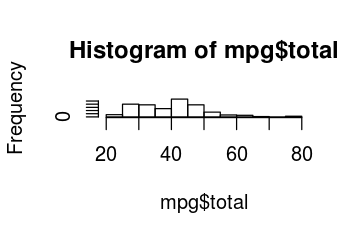

In [6]:
# ggplot 의 출력 크기를 정의
library(repr)
options(repr.plot.width = 3, repr.plot.height = 2)  

mpg$total <- mpg$cty + mpg$hwy   # 파생열 (사칙연산 활용)
hist(mpg$total)

[1] "f" "p" "p" "p" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f" "f"
[20] "f"


  f   p 
191  43 

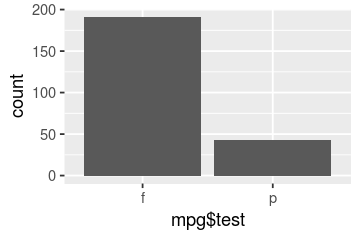

In [7]:
mpg$test <- ifelse(mpg$total>=50, "p", "f")   # 파생열 (조건문 활용)
head(mpg$test, 20)                            # 파생으로 생성된 Vector 출력
table(mpg$test)                               # table() : value_counts
qplot(mpg$test)                               # 데이터 빈도를 시각화

In [8]:
mpg$grade <- ifelse(mpg$total>= 30, "A",      # 파생열 (조건문 중복활용)
                    ifelse(mpg$total>=25,"B",
                           ifelse(mpg$total>=20,"C","D")))
table(mpg$grade)


  A   B   C 
204  25   5 

<br>
## <strong>3 분석의 기초 맛보기 

In [9]:
popl <- midwest
head(popl, 3)

popl      <- rename(popl, total = poptotal, asian = popasian)  # 컬럼명 변경
popl$var1 <- (popl$asian / popl$total) * 100                      # 변경된 컬럼으로 비율을 계산
mean(popl$var1, rm=is.na())                                     # 전체 평균을 계산

PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,⋯,percollege,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category
561,ADAMS,IL,0.052,66090,1270.9615,63917,1702,98,249,⋯,19.63139,4.355859,63628,96.27478,13.15144,18.01172,11.00978,12.44381,0,AAR
562,ALEXANDER,IL,0.014,10626,759.0000,7054,3496,19,48,⋯,11.24331,2.870315,10529,99.08714,32.24428,45.82651,27.38565,25.22898,0,LHR
563,BOND,IL,0.022,14991,681.4091,14477,429,35,16,⋯,17.03382,4.488572,14235,94.95697,12.06884,14.03606,10.85209,12.69741,0,AAR


[1] 0.4872462

<br>
## <strong>4 filter 와 %>% 활용
### <strong>01 조건에 맞는 데이터 추출하기

In [10]:
# 작업 폴더의 변경
getwd()
setwd('/home/markbaum/Python/Source/R/data'); getwd()
exam <- read.csv('csv_exam.csv')    # CSV 파일 불러오기
str(exam)

[1] "/home/markbaum/Python/Source/R"

[1] "/home/markbaum/Python/Source/R/data"

'data.frame':	20 obs. of  5 variables:
 $ id     : int  1 2 3 4 5 6 7 8 9 10 ...
 $ class  : int  1 1 1 1 2 2 2 2 3 3 ...
 $ math   : int  50 60 45 30 25 50 80 90 20 50 ...
 $ english: int  98 97 86 98 80 89 90 78 98 98 ...
 $ science: int  50 60 78 58 65 98 45 25 15 45 ...


In [11]:
# 1 filter
library(dplyr)
filter(exam, class == 1)       # class 가 1인 데이터만 출력
exam %>% filter(class == 1)    # %>% : 1줄로 attach를 실행시 활용

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58


id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78
4,1,30,98,58


In [12]:
# >, <, >=, <= : 초과, 미만, 이상, 이하의 조건걸기
df <- exam %>% filter(math > 50)
head(df, 3)

id,class,math,english,science
2,1,60,97,60
7,2,80,90,45
8,2,90,78,25


In [13]:
# and 조건 : ',' , '&'
df1 <- exam %>% filter(class != 1 , class != 2)   # class 가 1, 2가 아닌 데이터만 출력
df2 <- exam %>% filter(class != 1 & class != 2)   # (위와 동일)
head(df1, 3)
head(df2, 3)

id,class,math,english,science
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65


id,class,math,english,science
9,3,20,98,15
10,3,50,98,45
11,3,65,65,65


In [14]:
# or 조건 : '|', '%in%'
df1 <- exam %>% filter(math >= 90   | english >= 90); head(df1, 3)  # 수학이 90 이상  or  영어가 90 이상
df2 <- exam %>% filter(english < 90 | science < 50) ; head(df2, 3)  # 영어가 90 미만  or  과학이 50 미만
df3 <- exam %>% filter(class %in% c(1,3,5))         ; head(df3, 3)  # class 가 1 or 2 or 3 인 데이터

id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
4,1,30,98,58


id,class,math,english,science
3,1,45,86,78
5,2,25,80,65
6,2,50,89,98


id,class,math,english,science
1,1,50,98,50
2,1,60,97,60
3,1,45,86,78


In [15]:
# 1. 특정 데이터 추출 
df_y       <- select(mpg, "class", "cty")     ; head(df_y, 3)
df_suv     <- filter(mpg, class == "suv")     ; head(df_suv, 3)
df_compact <- filter(mpg, class == "compact") ; head(df_compact, 3)

class,cty
compact,18
compact,21
compact,20


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,test,grade
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,34,f,A
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv,26,f,B
chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,14,20,r,suv,34,f,A


manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,total,test,grade
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,47,f,A
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,50,p,A
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,51,p,A


In [16]:
mean(df_suv$cty)      # SUV의    평균 도시연비
mean(df_compact$cty)  # 도시형의 평균 도시연비

[1] 13.5

[1] 20.12766

### <strong>02 필요한 변수만 추출하기
수많은 변수 중 일부만 추출

In [17]:
df <- exam %>% select(math)                ; head(df, 3)  # select() : math 필요한 컬럼만 추출
df <- exam %>% select(class, math, english); head(df, 3)  # 여러 컬럼에서 추출
df <- exam %>% select(-math, -english)     ; head(df, 4)  # 특정 컬럼을 제외

math
50
60
45


class,math,english
1,50,98
1,60,97
1,45,86


id,class,science
1,1,50
2,1,60
3,1,78
4,1,58


In [18]:
# filter()와 select()의 조합
exam %>% filter(class == 1) %>% select(english)
exam %>% select(id, math)   %>% head(3)

english
98
97
86
98


id,math
1,50
2,60
3,45


### <strong>03 데이터 정렬하기
arrange()

In [19]:
exam %>% arrange(math) %>% head(2)              # (기본) 오름차순 정렬
exam %>% arrange(desc(math)) %>% head(3)        # desc() 내림차순 정렬
exam %>% arrange(class, desc(math)) %>% head(3) # class 오름차순(1순위),  math 내림차순(2순위) 

id,class,math,english,science
9,3,20,98,15
5,2,25,80,65


id,class,math,english,science
8,2,90,78,25
19,5,89,68,87
7,2,80,90,45


id,class,math,english,science
2,1,60,97,60
1,1,50,98,50
3,1,45,86,78


### <strong>04 파생변수 추가하기
mutate()

In [20]:
# total 필드를 추가하기
exam %>% mutate(total = math + english + science) %>% head(3)

id,class,math,english,science,total
1,1,50,98,50,198
2,1,60,97,60,217
3,1,45,86,78,209


In [21]:
# 여러 파생변수 한 번에 추가하기
exam %>% mutate(total = math + english + science,
                mean = (math + english + science) / 3) %>% head(3)

id,class,math,english,science,total,mean
1,1,50,98,50,198,66.00000
2,1,60,97,60,217,72.33333
3,1,45,86,78,209,69.66667


In [22]:
# mutate()에 ifelse()적용하기 
# 조건에 따른 '범주형 필드' 생성
exam %>% 
    mutate(test = ifelse(science >= 60, "pass", "fail")) %>% 
        head(3)

id,class,math,english,science,test
1,1,50,98,50,fail
2,1,60,97,60,pass
3,1,45,86,78,pass


In [23]:
# 필드 추가 후, 조건을 바로 붙여서 활용하기
exam %>% 
    mutate(total = math+english+science) %>% 
                                arrange(total) %>% 
                                    head(3)

id,class,math,english,science,total
9,3,20,98,15,133
14,4,48,87,12,147
12,3,45,85,32,162


### <strong>05 집단별로 요약하기
집단별 평균/ 빈도를 요약한 결과를 계산

In [24]:
exam %>% summarise(mean_math = mean(math))  # 필드 전체의 평균 계산하기
exam %>% group_by(class) %>%                # class 그룹별 묶은 뒤, 그룹별 평균 계산
    summarise(mean_math = mean(math))

mean_math
57.45


class,mean_math
1,46.25
2,61.25
3,45.00
4,56.75
5,78.00


In [25]:
exam %>% group_by(class) %>% summarise(mean_math   = mean(math),
                                        sum_math    = sum(math),
                                        median_math = median(math), 
                                        n = n())  # n() : 빈도측정 (학생수)

class,mean_math,sum_math,median_math,n
1,46.25,185,47.5,4
2,61.25,245,65.0,4
3,45.00,180,47.5,4
4,56.75,227,53.0,4
5,78.00,312,79.0,4


In [26]:
str(mpg)

'data.frame':	234 obs. of  14 variables:
 $ manufacturer: chr  "audi" "audi" "audi" "audi" ...
 $ model       : chr  "a4" "a4" "a4" "a4" ...
 $ displ       : num  1.8 1.8 2 2 2.8 2.8 3.1 1.8 1.8 2 ...
 $ year        : int  1999 1999 2008 2008 1999 1999 2008 1999 1999 2008 ...
 $ cyl         : int  4 4 4 4 6 6 6 4 4 4 ...
 $ trans       : chr  "auto(l5)" "manual(m5)" "manual(m6)" "auto(av)" ...
 $ drv         : chr  "f" "f" "f" "f" ...
 $ cty         : int  18 21 20 21 16 18 18 18 16 20 ...
 $ hwy         : int  29 29 31 30 26 26 27 26 25 28 ...
 $ fl          : chr  "p" "p" "p" "p" ...
 $ class       : chr  "compact" "compact" "compact" "compact" ...
 $ total       : int  47 50 51 51 42 44 45 44 41 48 ...
 $ test        : chr  "f" "p" "p" "p" ...
 $ grade       : chr  "A" "A" "A" "A" ...


In [27]:
mpg %>%
  group_by(manufacturer) %>%           # 회사별 그룹으로 묶은 뒤
  filter(class == 'suv') %>%           # 'suv' 데이터만 추출
  mutate(tot = (cty+hwy)) %>%          # $tot : 통합연비 필드 생성
  summarise(mean_tot = mean(tot)) %>%  # $mean_tot : group by로 묶은 통합연비 평균을 계산
  arrange(desc(mean_tot)) %>% head(3)  # $mean_tot를 내림차순으로 정렬

manufacturer,mean_tot
subaru,43.83333
toyota,32.62500
nissan,31.75000


### <strong>06 데이터 합치기 (Join)
여러 데이터를 합쳐서 하나의 데이터로 만든 후 분석

In [28]:
# data.frame 간의 Join
test1 <- data.frame(id       = c(1, 2, 3, 4, 5),
                    midterm  = c(60, 80, 70, 90, 85))
test2 <- data.frame(id       = c(1, 2, 3, 4, 5),
                    final    = c(70, 83, 65, 95, 80))
total <- left_join(test1, test2, by='id'); total

id,midterm,final
1,60,70
2,80,83
3,70,65
4,90,95
5,85,80


In [29]:
name     <- data.frame(class   = c(1, 2, 3, 4, 5),
                       teacher = c("kim", "lee", "park", "choi", "jung"))
exam_new <- left_join(exam, name, by = 'class')   # class 컬럼을 기준으로 테이블을 결합
exam_new %>% head(3)

id,class,math,english,science,teacher
1,1,50,98,50,kim
2,1,60,97,60,kim
3,1,45,86,78,kim


In [30]:
# bind_rows() : 데이터를 세로로 합친다
group_a <- data.frame(id   = c(1, 2, 3, 4, 5),
                      test = c(60, 80, 70, 90, 85))
group_b <- data.frame(id   = c(6, 7, 8, 9, 10),
                      test = c(70, 83, 65, 95, 80))
group_all <- bind_rows(group_a, group_b)
group_all

id,test
1,60
2,80
3,70
4,90
5,85
6,70
7,83
8,65
9,95
10,80
